<a href="https://colab.research.google.com/github/Ajinkya6597/Bike_sharing_demand_prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing required modules and loading dataset
import numpy as np
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid",{'grid.linestyle': '--'})


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/CAPSTONE PROJECTS/SUPERVISED ML REGRESSION/Bike Sharing Prediction-AJINKYA SHINGOTE/SeoulBikeData.csv",encoding= 'unicode_escape')

df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Getting shape of the data
df.shape

(8760, 14)

In [ ]:
# Getting details about all the features present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### Processing The Data

In [ ]:
# Checking for duplicated values
len(df[df.duplicated()])

0

In [ ]:
# Checking for total null values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

No duplicate records are found in the dataset.Now we can proceed further

# **Breaking down Date column into 3 columns, namely Day, Month, Year**

In [ ]:
df['Date'] = df['Date'].apply(lambda x:dt.strptime(x, "%d/%m/%Y"))
df['Day'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [ ]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,2018
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,2018
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,2018
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,2018


In [ ]:

# Lets add a new column named Weekend with binary values, indicating 1 for weekend and 0 for a weekday

df['Weekend']=df['Day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0


In [ ]:
#Dropping columns in vertical axis
df=df.drop(columns=['Date','Day','Year'],axis=1)

In [ ]:
#counting Functioning Day using value value_count
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

# **Exploratory Data Analysis**

Text(0, 0.5, 'Average Rented bikes per day')

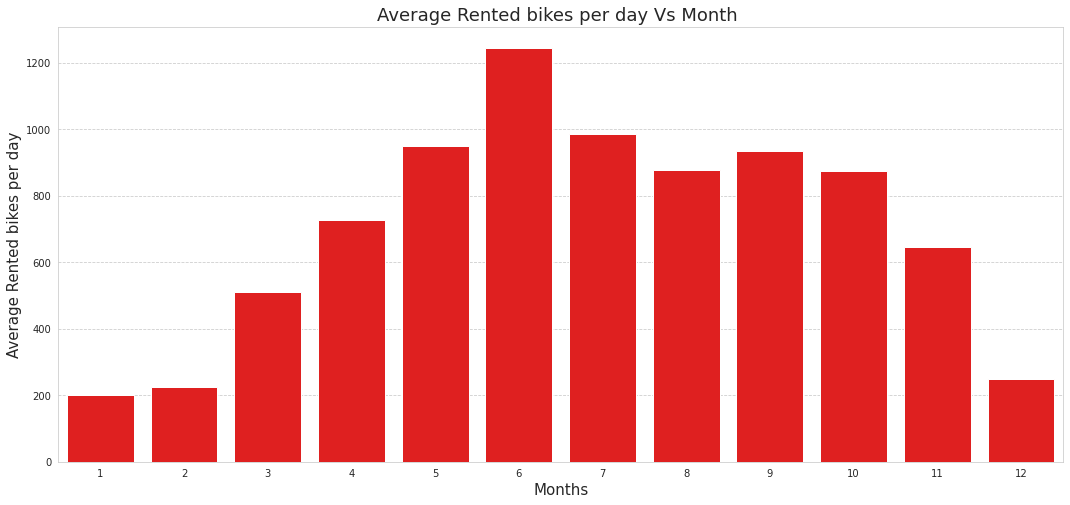

In [ ]:
# Visualisation of number of rented bikes vs Months

fig,ax=plt.subplots(figsize=(18,8))
sns.barplot(data=df,x='Month',y='Rented Bike Count',color = 'red' , ci=None)
ax.set_title('Average Rented bikes per day Vs Month ' , fontsize=18)
ax.set_xlabel('Months',fontsize=15)
ax.set_ylabel('Average Rented bikes per day',fontsize=15)

Text(0, 0.5, 'Average Rented Bikes per day')

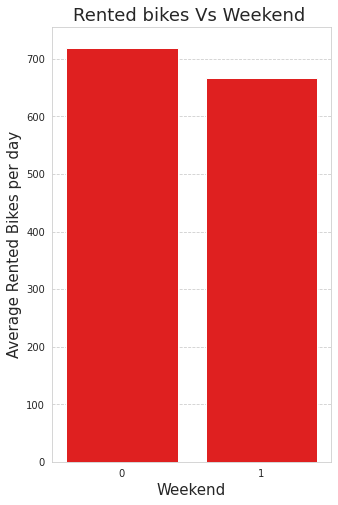

In [ ]:
# Visualisation of average number of rented bikes vs Weekday or Weekend

fig,ax=plt.subplots(figsize=(5,8))
sns.barplot(data=df,x='Weekend',y='Rented Bike Count',ax=ax,ci=None , color ='red')
ax.set_title('Rented bikes Vs Weekend ' , fontsize=18)
ax.set_xlabel('Weekend',fontsize=15)
ax.set_ylabel('Average Rented Bikes per day',fontsize=15)

Text(0, 0.5, 'Average Rented Bikes per day')

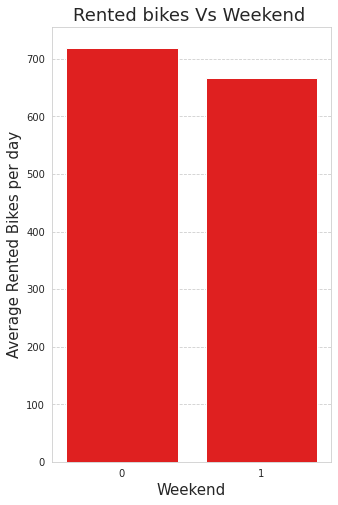

In [ ]:
# Visualisation of average number of rented bikes vs Weekday or Weekend

fig,ax=plt.subplots(figsize=(5,8))
sns.barplot(data=df,x='Weekend',y='Rented Bike Count',ax=ax,ci=None , color ='red')
ax.set_title('Rented bikes Vs Weekend ' , fontsize=18)
ax.set_xlabel('Weekend',fontsize=15)
ax.set_ylabel('Average Rented Bikes per day',fontsize=15)

Text(0, 0.5, 'Rented Bikes')

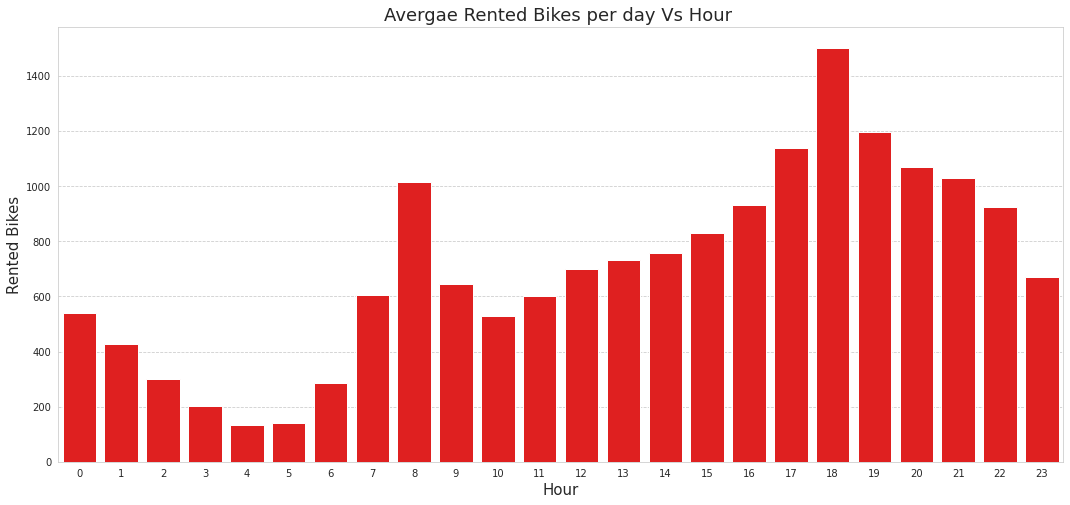

In [ ]:
# Visualisation of Rented bikes vs Hour of the Day

fig,ax=plt.subplots(figsize=(18,8))
sns.barplot(data=df,x='Hour',y='Rented Bike Count',ci= None ,  color ='red')
ax.set_title('Avergae Rented Bikes per day Vs Hour ', fontsize=18)
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Rented Bikes',fontsize=15)

Text(0, 0.5, 'Rented Bikes')

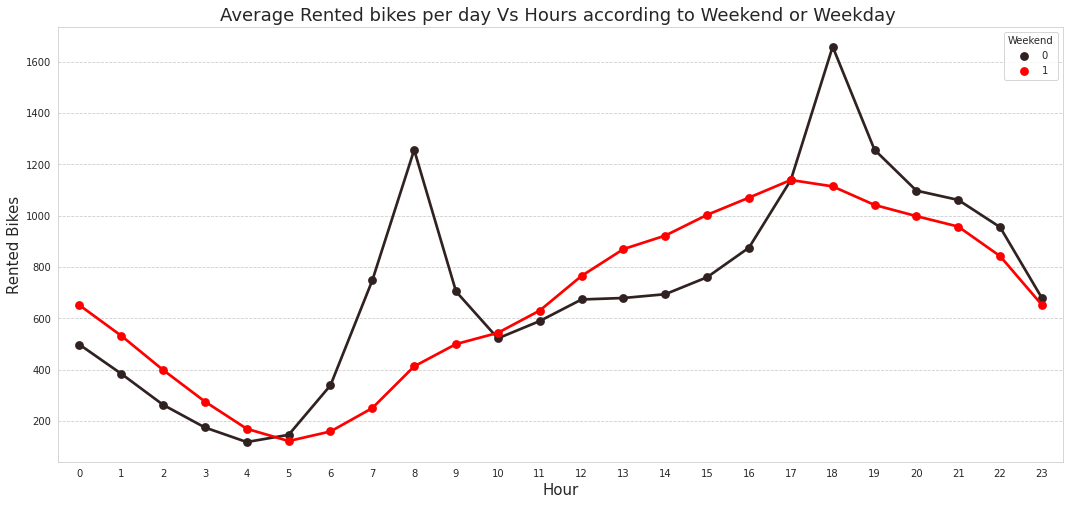

In [ ]:
# Visualisation of Average Rented bikes vs Hour of the Day by Weekend or Weeknday

fig,ax=plt.subplots(figsize=(18,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Weekend',ci= None, color ='red' )
ax.set_title('Average Rented bikes per day Vs Hours according to Weekend or Weekday ' , fontsize=18)
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Rented Bikes',fontsize=15)

From this visualizalisation we can conclude the following:

In Average Bike Rented vs Hour we can clearly see that at 6:00 PM average number of bike rented by the people was 1550. While at 00.00 or at midnight average bike rented was lowest with just around 550 bikes which were on weekdays.
In Average Bike Rented vs Hour we can also see that at 5:00 PM average number of bike rented by the people was around 1150. While at 00.00 or at midnight average bike rented was lowest with just around 650 bikes which were on weekend.

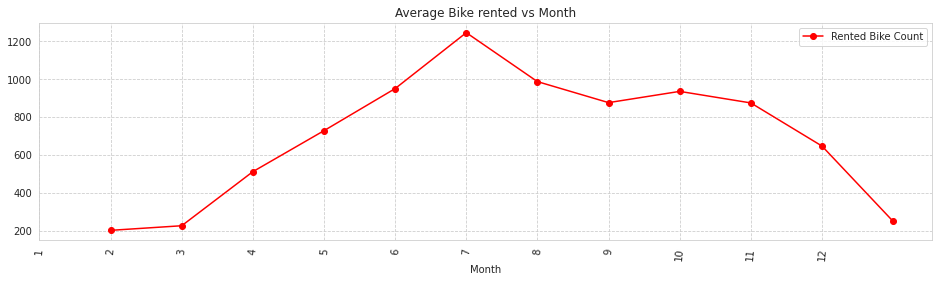

In [ ]:
avg_bike=df.groupby('Month')['Rented Bike Count'].mean()
plt.figure(figsize=(16,4))
s=avg_bike.plot(legend=True, marker='o',title=f'Average Bike rented vs Month',color='red')
s.set_xticks(range(len(avg_bike)))
s.set_xticklabels(avg_bike.index.tolist(),rotation = 85)
plt.show()

In Average Bike Rented vs Month we can clearly see that Average Bike rented in 
July was highest around 1250 and Average Bike Rented during month of February was the Lowest with just 200 average bike




Text(0, 0.5, 'Average Rented Bikes')

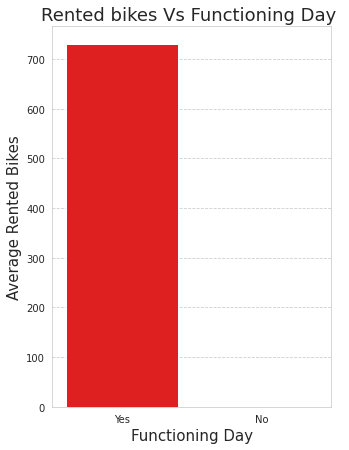

In [ ]:
# Analysis of rented Bikes Vs Functioning Day

fig,ax=plt.subplots(figsize=(5,7))
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count', ci=None,color = 'red' )
ax.set_title('Rented bikes Vs Functioning Day ', fontsize=18)
ax.set_xlabel('Functioning Day',fontsize=15)
ax.set_ylabel('Average Rented Bikes',fontsize=15)



*   From this Bar Plot we can conclude that Bikes are rented only on functioning day




Text(0, 0.5, 'Rented Bikes')

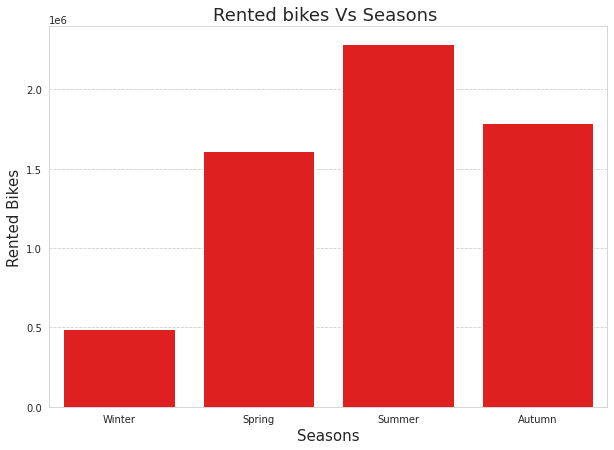

In [ ]:
# Analysis of Rented Bikes Vs Seasons
fig,ax=plt.subplots(figsize=(10,7))
sns.barplot(data=df,x='Seasons',y='Rented Bike Count', color ='red', ci= None , estimator= sum)
ax.set_title('Rented bikes Vs Seasons ' , fontsize=18)
ax.set_xlabel('Seasons',fontsize=15)
ax.set_ylabel('Rented Bikes',fontsize=15)



*   From this Bar Plot we can see that Highest number of bikes were rented during Summer seasons while least number of bikes were rented during Winter seasons
Maximum number of bikes are rented in season summer and rented bikes are least on winter season




Text(0, 0.5, 'Rented Bikes')

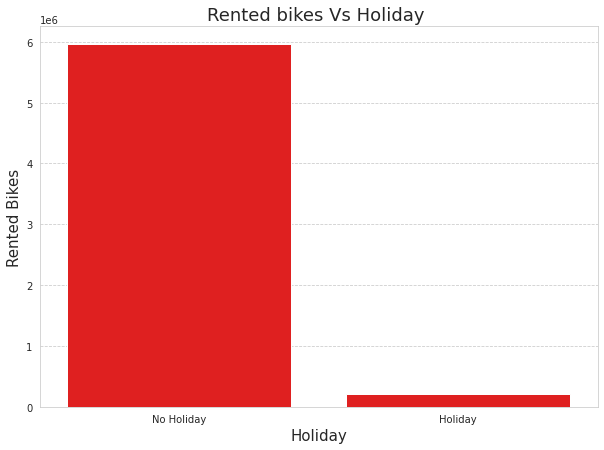

In [ ]:
# Analysis of Rented Bikes Vs Holiday or not

fig,ax=plt.subplots(figsize=(10,7))
sns.barplot(data=df,x='Holiday',y='Rented Bike Count', color ='red', ci= None , estimator= sum)
ax.set_title('Rented bikes Vs Holiday ' , fontsize=18)
ax.set_xlabel('Holiday',fontsize=15);
ax.set_ylabel('Rented Bikes',fontsize=15)



*  Here we can assume that Bikes were rented more when there is no holiday and very less as on Holidays




# **Analyze numerical Variables**

In [ ]:
#Storing all the numeric features in a variable list

numeric_features =['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


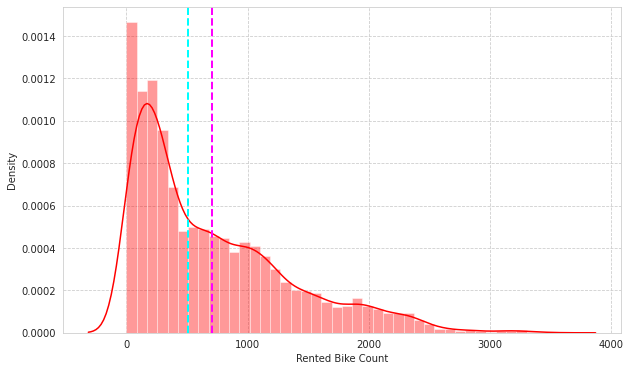

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


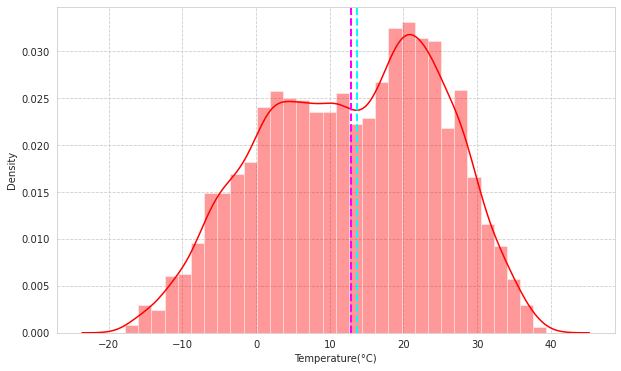

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


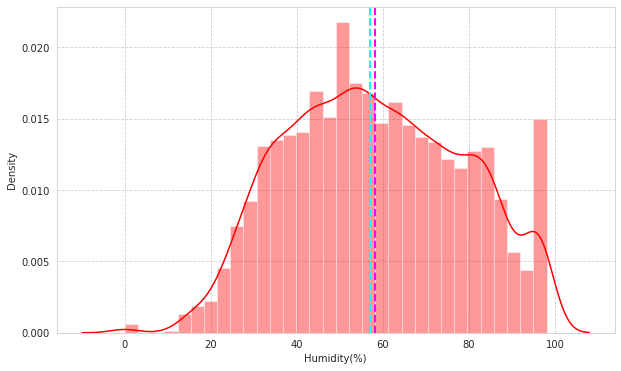

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


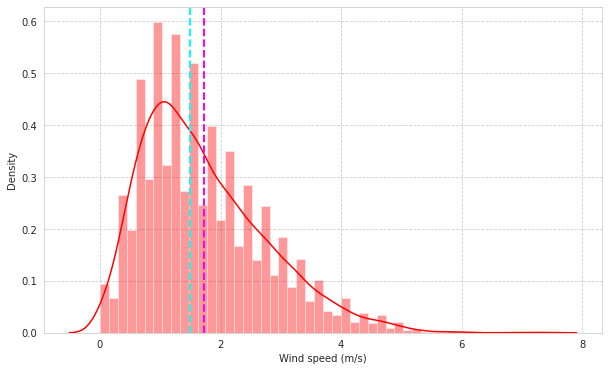

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


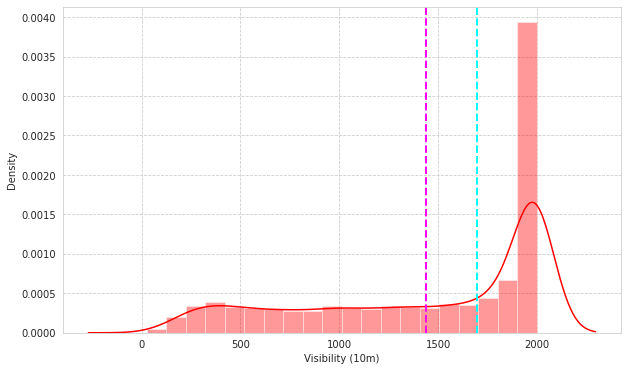

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


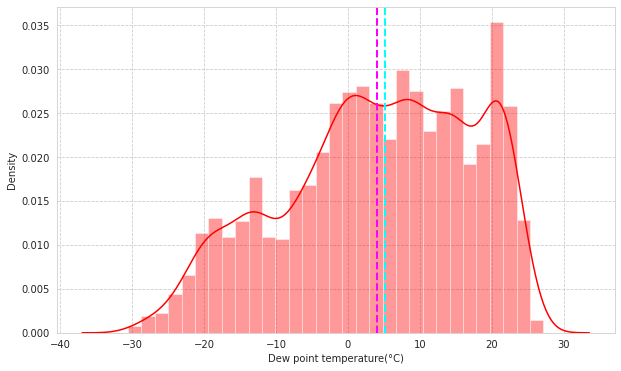

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


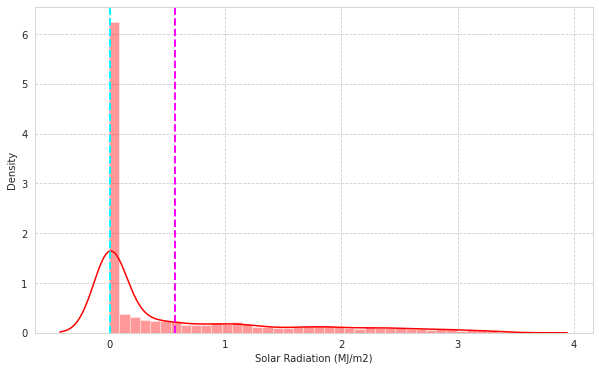

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


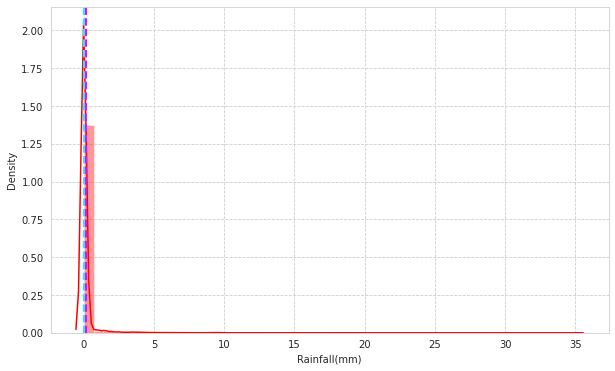

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


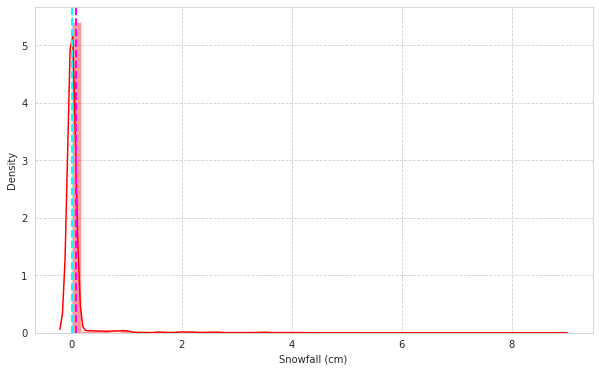

In [ ]:
#printing displots to analyze the distribution of all numerical features
for col in numeric_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col] , color ='red')
  plt.xlabel(col)
  plt.axvline(df[col].mean(),color='magenta', linestyle='dashed',linewidth=2)
  plt.axvline(df[col].median(),color='cyan', linestyle='dashed',linewidth=2)
  plt.show()
plt.show()



 In density plot for Rented Bike Count we can see the median and mean lies in range of 500 to 1000 mean is slightly greater than median which means its positively skewed.

In density plot for Temperature we can see that median is greater than mean we 
can say to some extend that this is negatively skewed.

In density plot for Humidity we can see that mean is greater than median we can say to some extend that this is positively skewed.

In density plot for WindSpeed we can see that mean is greater than median we can say to some extend that this is positively skewed.

In density plot for Visibility we can see that median is greater than mean we can say to some extend that this is negatively skewed.

In density plot for Dew Point Temperature we can see that median is greater than mean we can say to some extend that this is negatively skewed.

In density plot for Solar Radiation we can see that mean is greater than median we can say that this is positively skewed. 



# **Feature Description**

Date : Date feature which is str type is needed to convert it into Datet format DD/MM/YYYY.The new feature extracted from Date are Day, Month and year

Rented Bike Count : Number of bike rented which is our Dependent variable according to our problem statement which is int type.

Hour: Hour feature which is in 24 hour format which tells us number bike rented per hour is int type.

Temperature(°C): Temperature feature which is in celsius scale(°C) is Float type.

Humidity(%): Feature humidity in air (%) which is int type.

Wind speed (m/s) : Wind Speed feature which is in (m/s) is float type.

Visibility (10m): Visibility feature which is in 10m, is int type.

Dew point temperature(°C): Dew point Temperature in (°C) which tells us temperature at the start of the day is Float type.

Solar Radiation (MJ/m2): Solar radiation or UV radiation is Float type.

Rainfall(mm): Rainfall feature in mm which indicates 1 mm of rainfall which is equal to 1 litre of water per metre square is Float type.

Snowfall (cm): Snowfall in cm is Float type. Seasons: Season, in this feature four seasons are present in data is str type.

Holiday: whether no holiday or holiday can be retrieved from this feature is str type.

Functioning Day: Whether the day is Functioning Day or not can be retrieved from this feature is str type.

Weekend : Weekend extracted from Day 1 when the day is Saturday or Sunday while 0 when weekdays

*   List item
*   List item





# **Feature Engineering**


## **Regression plot**

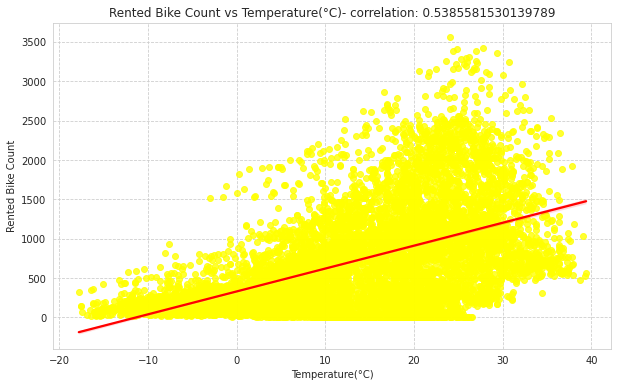

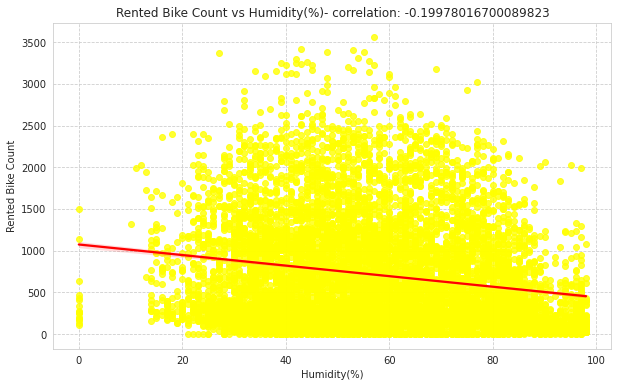

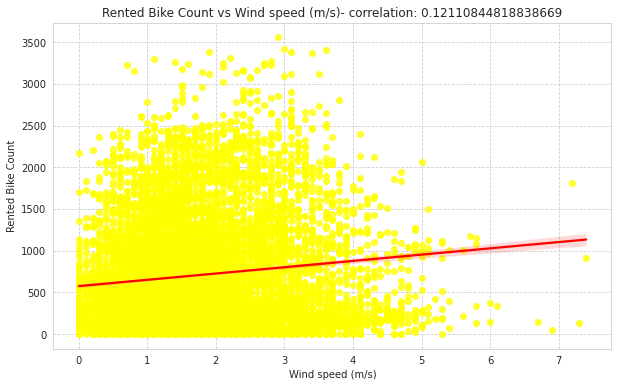

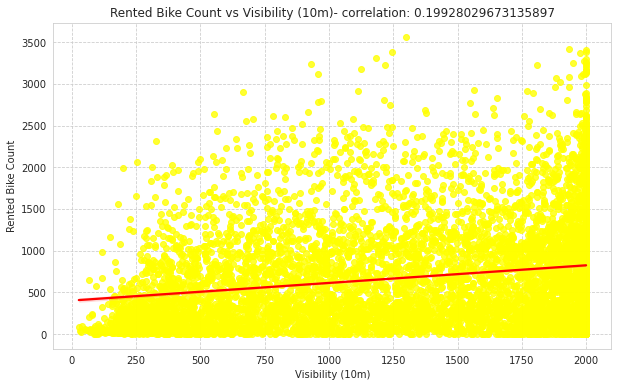

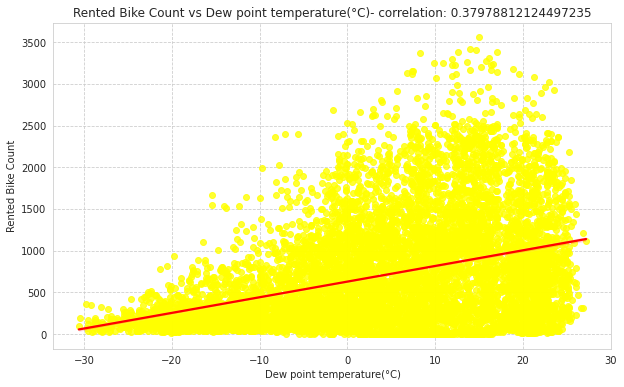

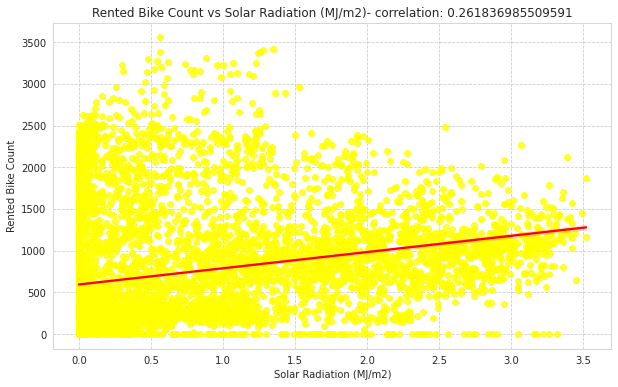

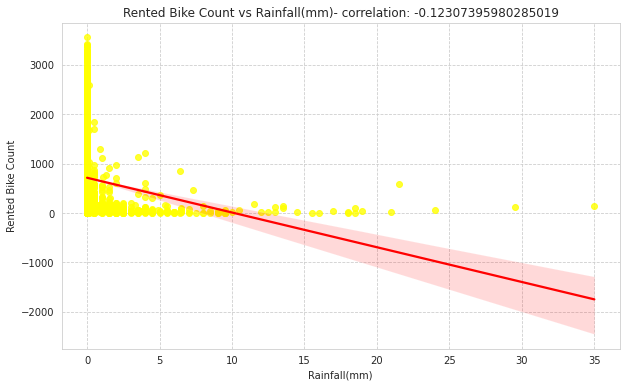

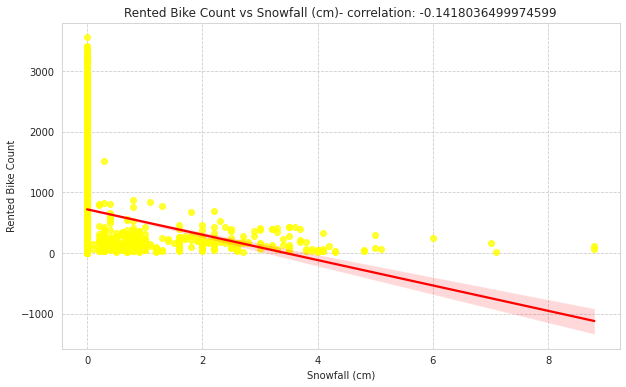

In [ ]:
#printing the regression plot for all the numerical features
for col in numeric_features[1:]:
  feature = df[col]
  label = df['Rented Bike Count']
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'yellow'}, line_kws={"color": "red"})
  correlation = feature.corr(label)
  ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))

From the above regression plots we can conclude that the columns

1.'Rainfall', 'Snowfall', 'Humidity' these features are negatively related with the dependent variaable. 

2.'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively correlated with the dependent variable.

In [ ]:
# Check the correlation plot

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Weekend
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,0.133514,-0.036467
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,0.000000,-0.000000
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,0.216183,0.007214
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,0.139875,-0.016951
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-0.156710,-0.022227
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,0.064874,-0.026762
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,0.242552,-0.006990
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-0.031595,0.012975
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,0.011958,-0.014151
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,0.053121,-0.006759


Temperature and Dew point temperature has highest correlation. Since for Linear Regression model, it is assumed that there is no multi-collinearity between Independent variables, we have remove multi-collinearity from this dataset

# **Checking VIF**

In [ ]:
# Definig function for VIF

def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Day', 'Month', 'Year']]])

,variables,VIF
0,Hour,4.418398
1,Temperature(°C),33.984042
2,Humidity(%),5.617480
3,Wind speed (m/s),4.809775
4,Visibility (10m),9.106191
5,Dew point temperature(°C),17.505235
6,Solar Radiation (MJ/m2),2.882383
7,Rainfall(mm),1.081868
8,Snowfall (cm),1.120882
9,Weekend,1.409388


After dropping temperature, VIF is in acceptable range, therefore we will drop temperature from our dataset


In [ ]:
df=df.drop(['Temperature(°C)'],axis=1)

In [ ]:
# Checking correlation plot after dropping Temperature 
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Weekend
Rented Bike Count,1.000000,0.410257,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,0.133514,-0.036467
Hour,0.410257,1.000000,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,0.000000,-0.000000
Humidity(%),-0.199780,-0.241644,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,0.139875,-0.016951
Wind speed (m/s),0.121108,0.285197,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-0.156710,-0.022227
Visibility (10m),0.199280,0.098753,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,0.064874,-0.026762
Dew point temperature(°C),0.379788,0.003054,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,0.242552,-0.006990
Solar Radiation (MJ/m2),0.261837,0.145131,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-0.031595,0.012975
Rainfall(mm),-0.123074,0.008715,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,0.011958,-0.014151
Snowfall (cm),-0.141804,-0.021516,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,0.053121,-0.006759
Month,0.133514,0.000000,0.139875,-0.156710,0.064874,0.242552,-0.031595,0.011958,0.053121,1.000000,0.012839


In [ ]:
# Ordinal encoding

df['Functioning Day']=df['Functioning Day'].map({'Yes':1,'No':0})
df['Holiday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})

In [ ]:
df

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Weekend
0,254,0,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,0
1,204,1,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,0
2,173,2,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,12,0
3,107,3,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,0
4,78,4,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,1,11,0
8756,764,20,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,1,11,0
8757,694,21,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,1,11,0
8758,712,22,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,1,11,0


In [ ]:
# One Hot Encoding

df_seasons=pd.get_dummies( df['Seasons'] )
df_month=pd.get_dummies( df['Month'] , prefix = 'Month')
df_hour=pd.get_dummies( df['Hour'] ,prefix = 'Hour' )

In [ ]:
# Join one hot encoded columns

df=df.join([df_seasons,df_month,df_hour])

In [ ]:
df=df.drop(columns = ['Hour', 'Seasons' ,'Month'])

In [ ]:

df.columns

Index(['Rented Bike Count', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Weekend', 'Autumn', 'Spring', 'Summer', 'Winter',
       'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6',
       'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23'],
      dtype='object')


## **Checking Distribution Rented Bike Count column data**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


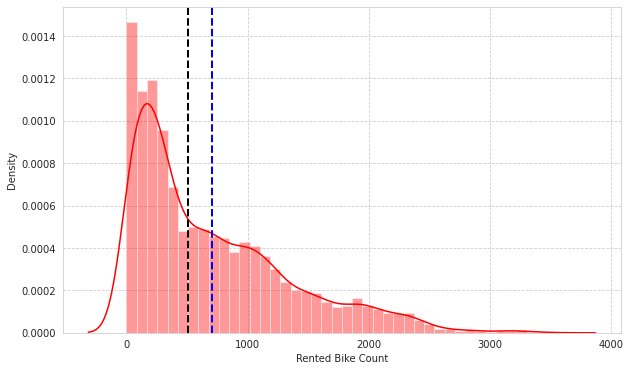

In [ ]:
# Distribution plot of Rented Bike Count

plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented Bike Count'],hist=True ,color="red")
ax.axvline(df['Rented Bike Count'].mean(), color='blue', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

In density plot for Rented Bike Count we can see the median and mean lies in range of 500 to 1000 mean is slightly greater than median which means its positively skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


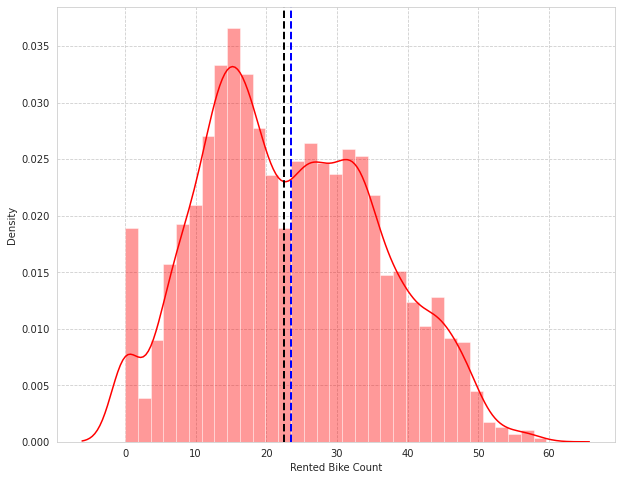

In [ ]:
#Applying square root to Rented Bike Count to reduce skewness

plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented Bike Count']), color="red")
ax.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='blue', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

In [ ]:
# Applying square root to Rented Bike Count column

df['Rented Bike Count']=np.sqrt(df['Rented Bike Count'])

In [ ]:
# Defining function for plotting y test  and y train values

def get_linear_graph(pred_value , y_test ):
  plt.figure(figsize=(15,7))
  plt.plot(pred_value[:100])
  plt.plot(np.array(y_test[:100]))
  plt.legend(['Predicted','Actual'])
  plt.show()

In [ ]:
# defining function for feature importance
def get_feat_imp(model):
  feat_importances = pd.Series(model.feature_importances_, index=X.columns)
  plt.figure(figsize=(15,8))
  plt.title('Feature Importance')
  feat_importances.nlargest(10).plot(kind='barh', color= 'red')
  plt.show()


## **Data preparation**

In [ ]:
# Creating copy of data

data= df.copy()

In [ ]:
# Create the data of dependent and independent variables

y = data['Rented Bike Count']
X = data.drop(columns=['Rented Bike Count'], axis=1)

In [ ]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)
print(X_train.shape)
print(X_test.shape)

(7008, 50)
(1752, 50)


In [ ]:
# Transforming data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Linear Regression **bold text**

In [ ]:
# Fitting onto Linear regression Model 

reg= LinearRegression().fit(X_train, y_train)

In [ ]:
# Getting the X_train and X-test value

y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)


Evluation Matrix for Linear Regression

In [ ]:
# Calculate MSE, MAE, R2 for training data


MSEl = mean_squared_error((y_train), (y_pred_train))
MAEl= mean_absolute_error(y_train, y_pred_train)
r2l = r2_score(y_train, y_pred_train)


# Calculate MSE, MAE, R2 for testing data


MSEtestl = mean_squared_error((y_test), (y_pred_test))
MAEtestl= mean_absolute_error(y_test, y_pred_test)
r2testl = r2_score(y_test, y_pred_test)

In [ ]:

# Printing Errors

print('Training Errors\nMSE:', MSEl , '\nMAE:' , MAEl , '\nR2:',round((r2l),3))
print('\n\nTesting Errors\nMSE:', MSEtestl , '\nMAE:' , MAEtestl , '\nR2:',round((r2testl),3))

Training Errors
MSE: 34.44336867099856 
MAE: 4.436386147115236 
R2: 0.779


Testing Errors
MSE: 34.12259815703738 
MAE: 4.365733053317397 
R2: 0.774


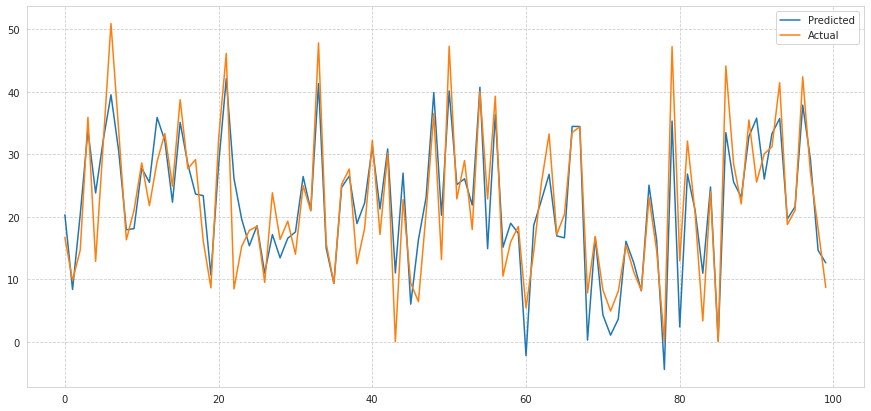

In [ ]:

get_linear_graph(y_pred_test , y_test )

In [ ]:
# storing the train set metrics value in a dataframe for later comparison

dict1={'Model':'Linear regression ',
       'MAE':round((MAEl),3),
       'MSE':round((MSEl),3),
       'R2_score':round((r2l),3),
       }
training_df=pd.DataFrame(dict1,index=[1])


# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAEtestl),3),
       'MSE':round((MSEtestl),3),
       'R2_score':round((r2testl),3)
       }
test_df=pd.DataFrame(dict2,index=[1])


# **Polynomial Regression**

In [ ]:
# Fitting training data onto Polynomial regression Model 

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)


# Fitting training data onto Polynomial regression Model 

poly = LinearRegression().fit(X_poly, y_train)


# Getting the y_train and y-test value

y_pred_poly_train = poly.predict(X_poly)
y_pred_poly_test= poly.predict(X_poly_test)

 Evaluation Matrix for Polynomial Regression

In [ ]:
# Calculate MSE, MAE, R2 for training data

MSEp = mean_squared_error((y_train), (y_pred_poly_train))
MAEp= mean_absolute_error(y_train, y_pred_poly_train)
r2p = r2_score(y_train, y_pred_poly_train)

In [ ]:
# Calculate MSE, MAE, R2 for testing data

MSEtestp = mean_squared_error((y_test), (y_pred_poly_test))
MAEtestp= mean_absolute_error(y_test, y_pred_poly_test)
r2testp = r2_score(y_test, y_pred_poly_test)

In [ ]:
# Printing Errors

print('Training Errors\nMSE:', MSEp , '\nMAE:' , MAEp , '\nR2:',round((r2p),2))
print('\n\nTesting Errors\nMSE:', MSEtestp , '\nMAE:' , MAEtestp , '\nR2:',round((r2testp),2))

Training Errors
MSE: 11.516681416352801 
MAE: 2.2468497517908688 
R2: 0.93


Testing Errors
MSE: 14.65102962893571 
MAE: 2.5408680415771387 
R2: 0.9


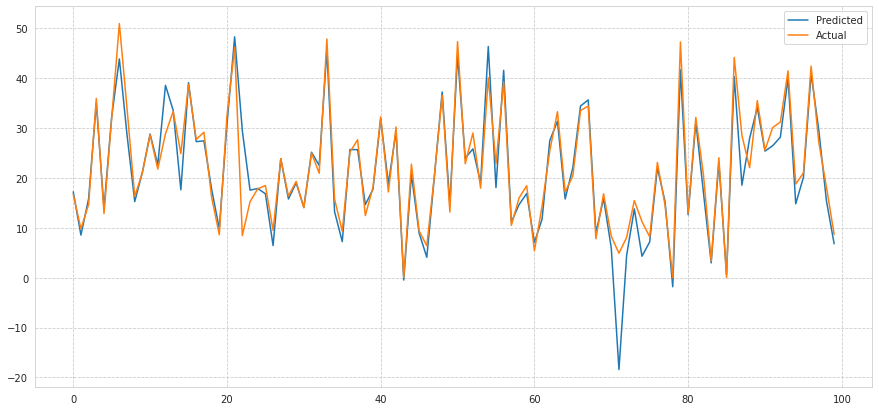

In [ ]:

get_linear_graph(y_pred_poly_test , y_test )

In [ ]:
# storing the train set metrics value in a dataframe for later comparison

dict1={'Model':'Polynomial regression ',
       'MAE':round((MAEp),3),
       'MSE':round((MSEp),3),
       'R2_score':round((r2p),3)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# storing the test set metrics value in a dataframe for later comparison

dict2={'Model':'Polynomial regression ',
       'MAE':round((MAEtestp),3),
       'MSE':round((MSEtestp),3),
       'R2_score':round((r2testp),3)
       }
test_df=test_df.append(dict2,ignore_index=True)

# **Decision Tree Regressor**

In [ ]:
# Creating object wth Decision tree regressor with critera of mean squared error, maximum depth being 10, maximum leaf noodes being 120

decision_regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=10, max_leaf_nodes=120)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=120)

In [ ]:
# Getting the y_train and y-test value

y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)


## **Evaluation Matrix for Decision Tree Regressor**

In [ ]:
# Calculate MSE, MAE, R2 for training data


MSEdt = mean_squared_error((y_train), (y_pred_train_d))
MAEdt = mean_absolute_error(y_train, y_pred_train_d)
r2dt = r2_score(y_train, y_pred_train_d)

In [ ]:
# Calculate MSE, MAE, R2 for testing data


MSEtestdt = mean_squared_error((y_test), (y_pred_test_d))
MAEtestdt = mean_absolute_error(y_test, y_pred_test_d)
r2testdt = r2_score(y_test, y_pred_test_d)

In [ ]:
# Printing Errors

print('Training Errors\nMSE:', MSEdt , '\nMAE:' , MAEdt , '\nR2:',round((r2dt),3))
print('\n\nTesting Errors\nMSE:', MSEtestdt , '\nMAE:' , MAEtestdt , '\nR2:',round((r2testdt),3))

Training Errors
MSE: 25.793982334841058 
MAE: 3.7210179188275037 
R2: 0.835


Testing Errors
MSE: 29.90175193331236 
MAE: 3.9701362007157686 
R2: 0.802


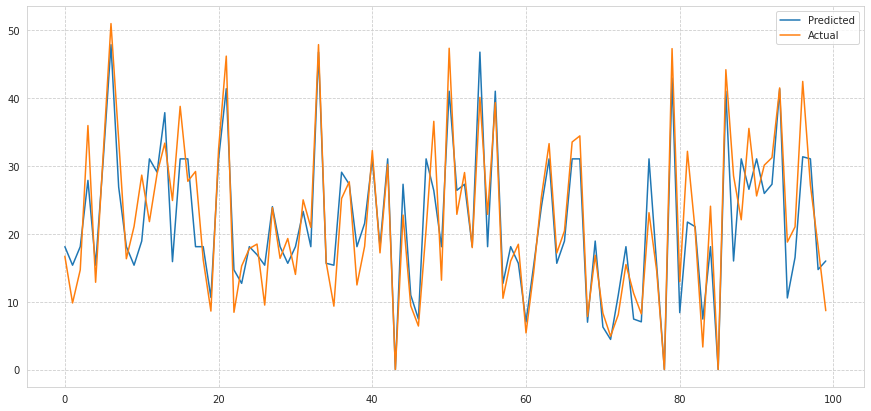

In [ ]:
get_linear_graph(y_pred_test_d , y_test )

In [ ]:
# storing the train set metrics value in a dataframe for later comparison
dict1={'Model':'Decision Tree Regression ',
       'MAE':round((MAEdt),3),
       'MSE':round((MSEdt),3),
       'R2_score':round((r2dt),3),
}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2 = {'Model':'Decision Tree Regression ',
       'MAE':round((MAEtestdt),3),
       'MSE':round((MSEtestdt),3),
       'R2_score':round((r2testdt),3),
}
test_df=test_df.append(dict2,ignore_index=True)

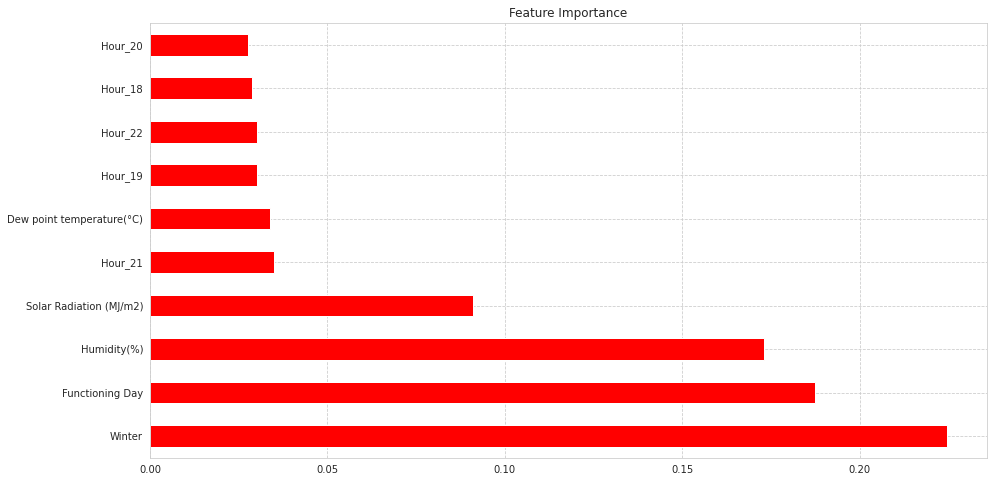

In [ ]:
get_feat_imp(decision_regressor)

Here we can see Hour_20 is showing least feature importance while Winter season is showing highest feature importance in model prediction.


# **Random Forrest Regressor**

In [ ]:
rfc = RandomForestRegressor(n_estimators = 180, random_state = 21 ,criterion= 'mse',max_depth=13 ,max_leaf_nodes= 80)
rfc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=13, max_leaf_nodes=80,
                      n_estimators=180, random_state=21)

In [ ]:
# Prediction on  train dataset

y_pred_trainrfc = rfc.predict(X_train)

In [ ]:
#Prediction  on  test dataset

y_pred_testrfc = rfc.predict(X_test)

# **Evaluation Matrix for Random Forest**

In [ ]:
# Calculate MSE, MAE, R2 for training data


MSErfc = mean_squared_error(y_train, y_pred_trainrfc)
MAErfc = mean_absolute_error(y_train, y_pred_trainrfc)
r2rfc = r2_score(y_train, y_pred_trainrfc)

In [ ]:
# Calculate MSE, MAE, R2 for testing data


MSEtestrf = mean_squared_error((y_test), (y_pred_testrfc))
MAEtestrf = mean_absolute_error(y_test, y_pred_testrfc)
r2testrf = r2_score(y_test, y_pred_testrfc)

In [ ]:
# Printing Errors

print('Training Errors\nMSE:', MSErfc , '\nMAE:' , MAErfc , '\nR2:',round((r2rfc),3))
print('\n\nTesting Errors\nMSE:', MSEtestrf , '\nMAE:' , MAEtestrf , '\nR2:',round((r2testrf),3))

Training Errors
MSE: 17.410712899141867 
MAE: 3.107133318857302 
R2: 0.888


Testing Errors
MSE: 18.8454619617235 
MAE: 3.1542327512216732 
R2: 0.875


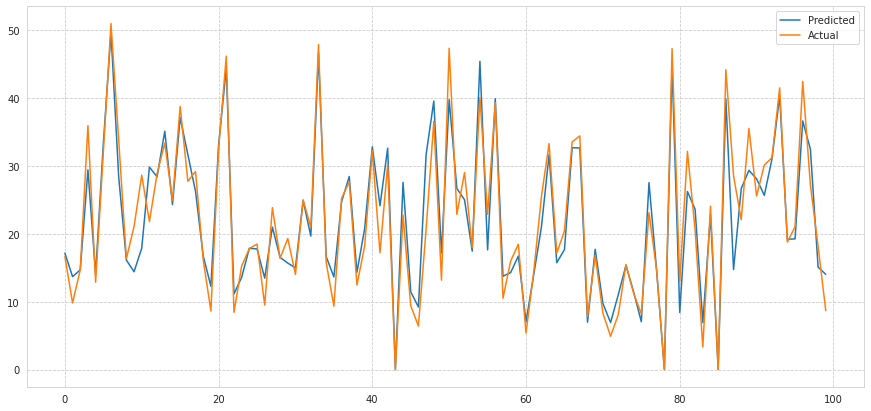

In [ ]:

get_linear_graph(y_pred_testrfc , y_test )

In [ ]:
# storing the train set metrics value in a dataframe for later comparison

dict1={'Model':'Random Forrest ',
       'MAE':round((MAErfc),3),
       'MSE':round((MSErfc),3),
       'R2_score':round((r2rfc),3)}
       
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# storing the train set metrics value in a dataframe for later comparison

dict2={'Model':'Random Forrest ',
       'MAE':round((MAEtestrf),3),
       'MSE':round((MSEtestrf),3),
       'R2_score':round((r2testrf),3)}
       
test_df=test_df.append(dict2,ignore_index=True)

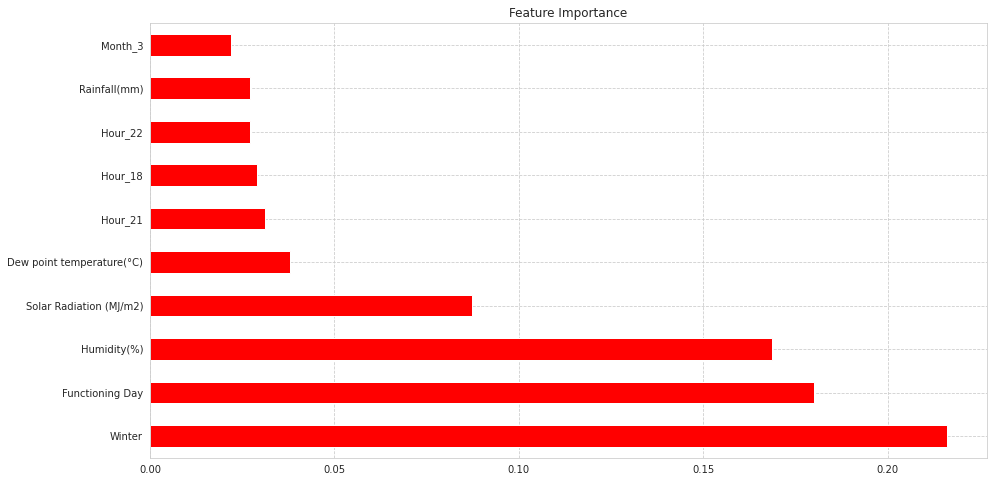

In [ ]:

get_feat_imp(rfc)


# **Gradient Boost with Gridsearch**

In [ ]:
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [4,6,8,10],
              'min_samples_split' : [50,80,100],
              'min_samples_leaf' : [40,50]}

In [ ]:
gb = GradientBoostingRegressor()

In [ ]:
# Grid search
gb_grid = GridSearchCV(estimator=gb,
                       param_grid = param_dict,
                       cv = 5, verbose=0)

In [ ]:
gb_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 80, 100],
                         'n_estimators': [50, 80, 100]})

In [ ]:
GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 80, 100],
                         'n_estimators': [50, 80, 100]})

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 80, 100],
                         'n_estimators': [50, 80, 100]})

In [ ]:

gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=10, min_samples_leaf=40,
                          min_samples_split=50)

In [ ]:
# Putting Best possible paramteres into model

gb_optimal_model = gb_grid.best_estimator_

In [ ]:
# Making predictions on train and test data

y_pred_traingbg = gb_optimal_model.predict(X_train)
y_predgbg= gb_optimal_model.predict(X_test)

In [ ]:
# Calculate MSE, MAE, R2 for training data


MSEGBG = mean_squared_error((y_train), (y_pred_traingbg))
MAEGBG = mean_absolute_error(y_train, y_pred_traingbg)
r2GBG = r2_score(y_train, y_pred_traingbg)

In [ ]:
# Calculate MSE, MAE, R2 for testing data


MSEtestGBG = mean_squared_error((y_test), (y_predgbg))
MAEtestGBG = mean_absolute_error(y_test, y_predgbg)
r2testGBG = r2_score(y_test, y_predgbg)

In [ ]:
# Printing Errors

print('Training Errors\nMSE:', MSEGBG , '\nMAE:' , MAEGBG , '\nR2:',round((r2GBG),3))
print('\n\nTesting Errors\nMSE:', MSEtestGBG , '\nMAE:' , MAEtestGBG , '\nR2:',round((r2testGBG),3))

Training Errors
MSE: 6.502066630324401 
MAE: 1.712901821228588 
R2: 0.958


Testing Errors
MSE: 10.078320275215763 
MAE: 2.167583140792035 
R2: 0.933


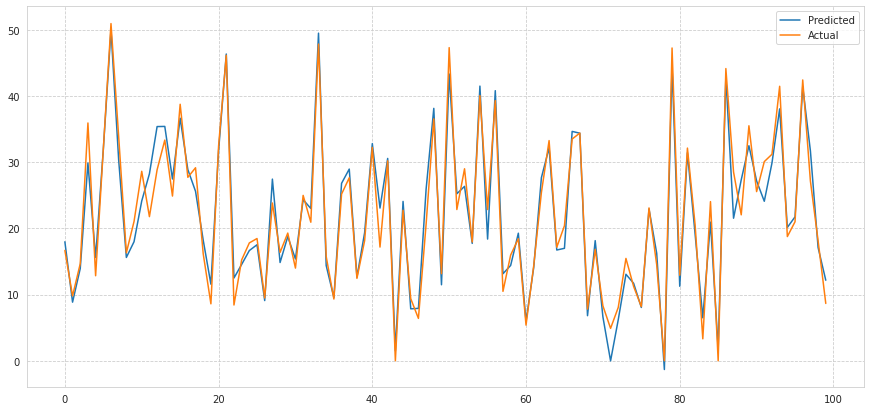

In [ ]:

get_linear_graph(y_predgbg , y_test )

In [ ]:
# storing the train set metrics value in a dataframe for later comparison

dict1={'Model':'Gradient Boost with GridSearch ',
       'MAE':round((MAEGBG),3),
       'MSE':round((MSEGBG),3),
       'R2_score':round((r2GBG),3)}
       
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# storing the train set metrics value in a dataframe for later comparison

dict2={'Model':'Gradient Boost with GridSearch ',
       'MAE':round((MAEtestGBG),3),
       'MSE':round((MSEtestGBG),3),
       'R2_score':round((r2testGBG),3)}
       
test_df=test_df.append(dict2,ignore_index=True)

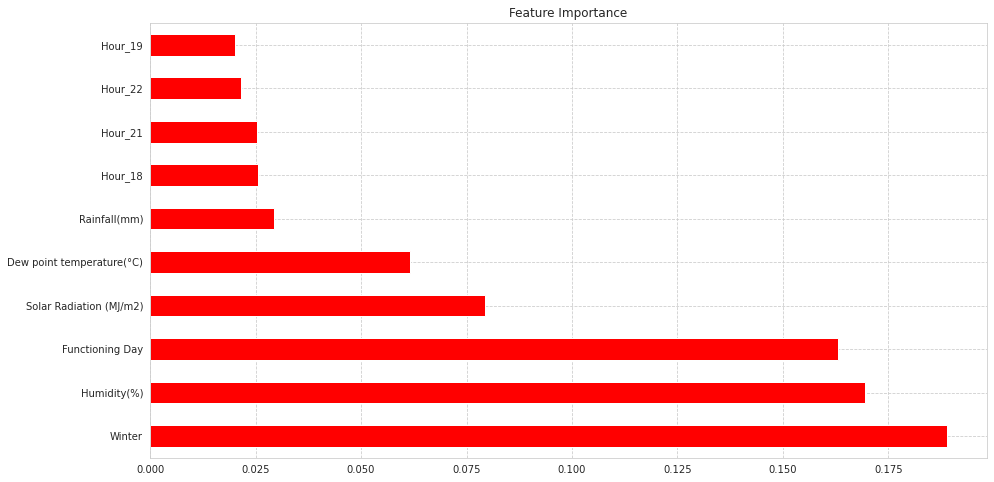

In [ ]:

get_feat_imp(gb_optimal_model)

Here we can see Hour_19 is showing least feature importance while Winter season is showing highest feature importance in model prediction.

In [ ]:
# Combining Train and Test erros in a single dataframe

matrix = pd.concat([training_df,test_df],keys=['Training set','Test set'], axis =1)

In [ ]:

matrix

Training set                          \
                             Model    MAE     MSE R2_score   
0               Linear regression   4.436  34.443    0.779   
1           Polynomial regression   2.247  11.517    0.926   
2        Decision Tree Regression   3.721  25.794    0.835   
3                  Random Forrest   3.107  17.411    0.888   
4  Gradient Boost with GridSearch   1.713   6.502    0.958   

                          Test set                          
                             Model    MAE     MSE R2_score  
0               Linear regression   4.366  34.123    0.774  
1           Polynomial regression   2.541  14.651    0.903  
2        Decision Tree Regression   3.970  29.902    0.802  
3                  Random Forrest   3.154  18.845    0.875  
4  Gradient Boost with GridSearch   2.168  10.078    0.933

In [ ]:
temp= test_df[['Model','R2_score']]
temp= temp.sort_values(by='R2_score', ascending=True)

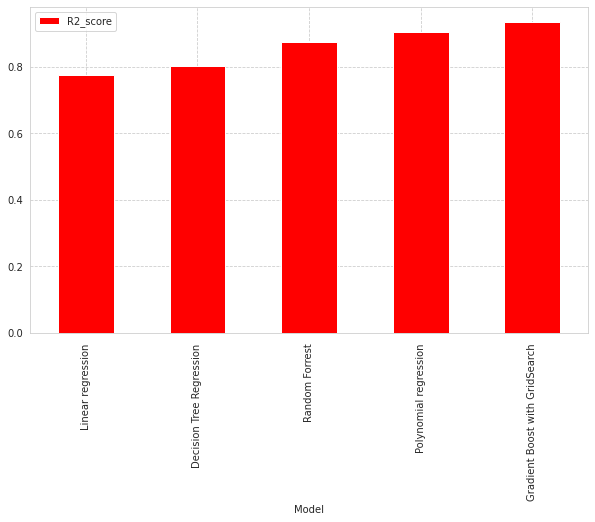

In [ ]:
temp.plot(x="Model", y=["R2_score"],color ='r' ,kind="bar", figsize=(10, 6))

Here we can see that Gradient Boost with GridSearch is giving highest R2 score of on both Train and Test dataset. Therefore we can say that Gradient Boost is giving us optimal result in term of test dataset and is best for final prediction.


# **Model explainability**


# SHAP(SHapley Additive exPlanations)



 SHAP Interpretation

Base value: This is the avaerage feature value. This value is used to determine if the prediction is whether true or false.

Red color Block: This represent the feature for which the prediction is positive. Higher this value will pushes the prediction positively.

Blue color block: This represent the feature for which the prediction is 
negative. higher this value will pushes the prediction negatively

Block size: the block size shows the feature importance. larger the block size larger will the feature importance value.



In [ ]:
!pip install shap
from sklearn.tree import export_graphviz
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.1 MB/s 


# Creating function for getting shape OF tree based model with JS visualization using SHAP in notebook environment

In [ ]:
#creating function for getting shape of JS visualization using shap in notebook environment
def get_shap(model):
  sns.set_style('darkgrid')
  for_instance=2
  shap.initjs() #to get JS visualisation
  explainer = shap.TreeExplainer(model)
  shap_values = explainer(X_test,check_additivity=False) #using explainer.shap_values to get shap values of each feature
  return shap.plots.force(shap_values[for_instance],feature_names=X.columns)

# Creating Function to get SHAP summary

In [ ]:
#creatung function to get shap summary
def get_shap_summary(model):
  model.fit(X_test,y_test)
  explainer = shap.TreeExplainer(model)
  shap_values=explainer.shap_values(X_test,check_additivity=False) #using explainer.shap_values to get shap values of each feature
  return shap.summary_plot(shap_values, X_test,feature_names=X.columns)

In [ ]:
#creatung function to get shap summary
def get_shap_summary2(model):
  model.fit(X_test,y_test)
  explainer = shap.TreeExplainer(model)
  shap_values=explainer.shap_values(X_test,check_additivity=False) #using explainer.shap_values to get shap values of each feature
  return shap.summary_plot(shap_values, X_test, plot_type="bar",feature_names=X.columns)  #getting the names of feature and plotting the same

# SHAP for Decision Tree Regressor

In [ ]:
#calling function to get shap JS visualization
get_shap(decision_regressor)

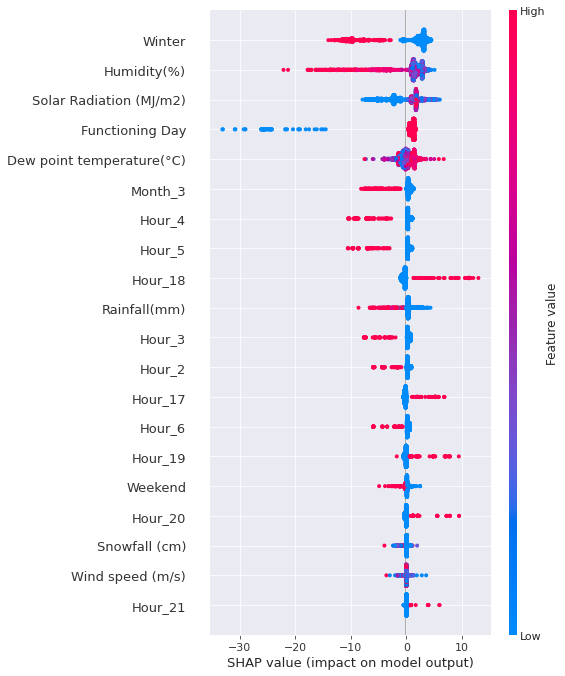

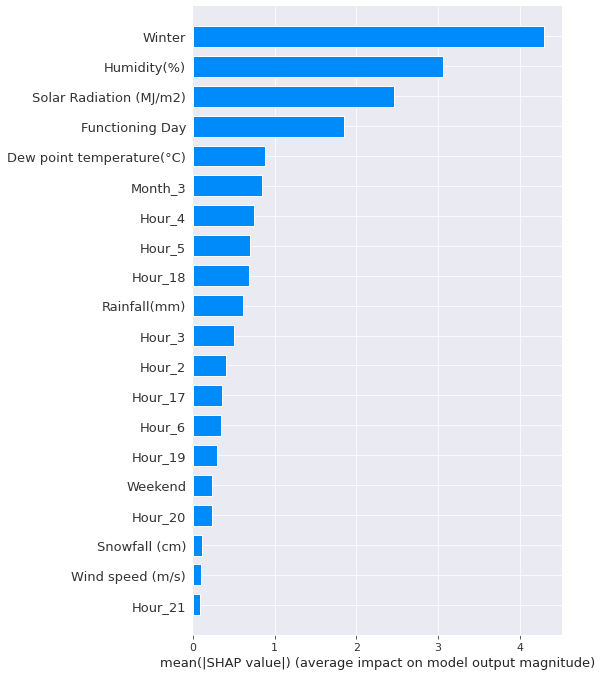

In [ ]:
#calling functions to get shap summary
get_shap_summary(decision_regressor)
get_shap_summary2(decision_regressor)

Here we can see negative feature or blue color block pushes the prediction toward left over base value and causing prediction negative.

Also we can see from SHAP summary that high Hour_18 value increasing predicted bike demand. Also we can see low Snowfall value increasing predicted bike demand.

In bar graph we can see Winter has the highest feature value while Hour_21 has the Lowest feature_value

# SHAP for Random Forest Regressor

In [ ]:
#calling function to get shap JS visualization
get_shap(rfc)

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.


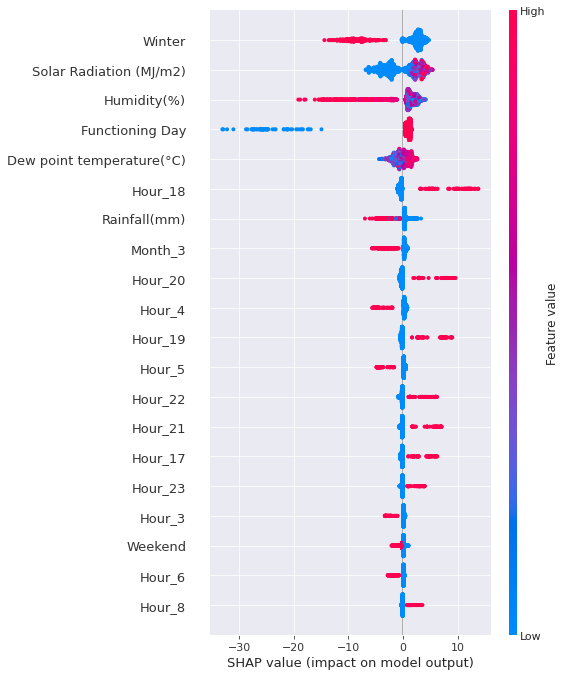

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.


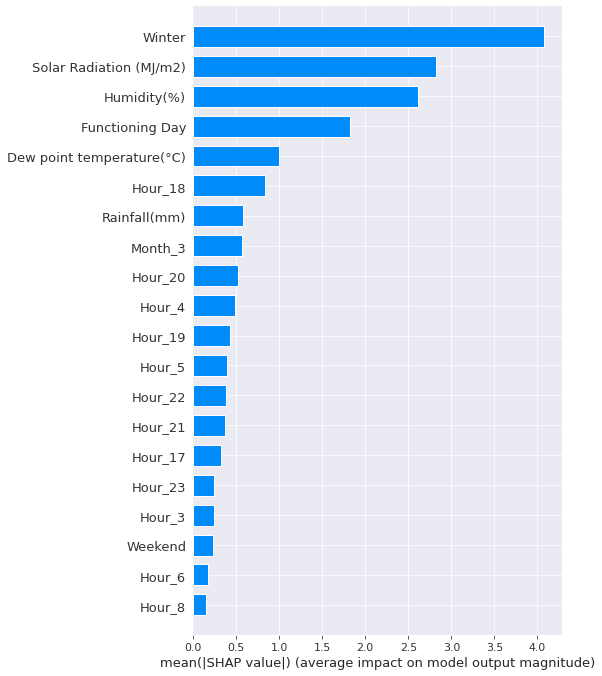

In [ ]:
#calling functions to get shap summary
get_shap_summary(rfc)
get_shap_summary2(rfc)

Here we can see negative feature or blue color block pushes the prediction toward left over base value and causing prediction negative.

Also we can see from SHAP summary that Hour_18 value increasing predicted bike demand. Also we can see low Weekend value increasing predicted bike demand.

In bar graph we can see Winter has the highest feature value while Hour_8 has the Lowest feature_value

# SHAP for Gradient Boost with Gridsearch

In [ ]:
#calling function to get shap JS visualization
get_shap(gb_grid.best_estimator_) #using bestestimator of gradient boost using Grid search CV so to shap

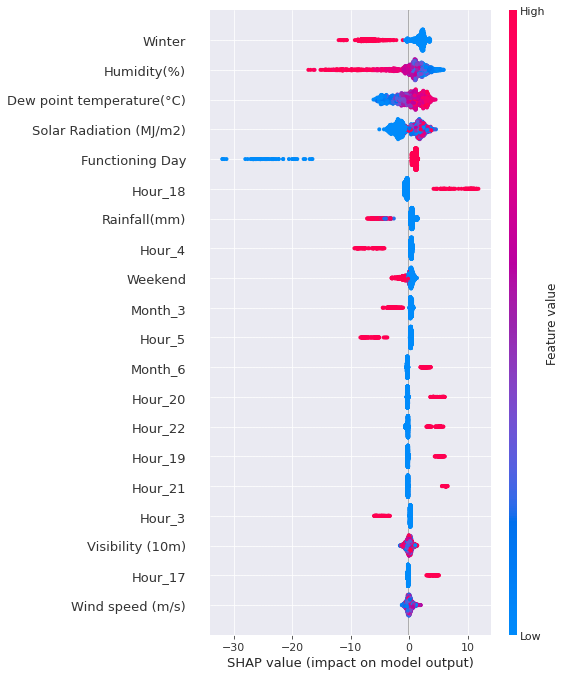

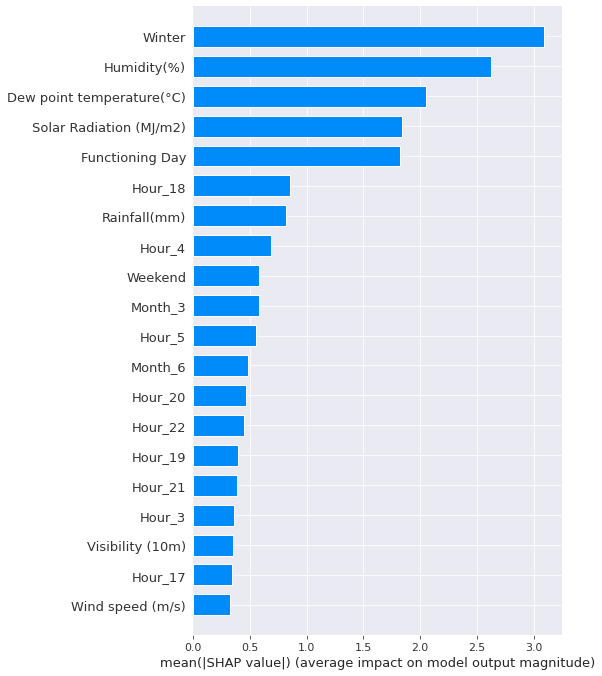

In [ ]:
#calling functions to get shap summary
get_shap_summary(gb_grid.best_estimator_)
get_shap_summary2(gb_grid.best_estimator_)

Here we can see negative feature or blue color block pushes the prediction toward left over base value and causing prediction negative.

Also we can see from SHAP summary that Hour_18 value increasing predicted bike demand.

 Also we can see low Weekend value increasing predicted bike demand.
In bar graph we can see Winter has the highest feature value while Wind Speed has the Lowest feature_value

# **Conclusion:-**
1. In summer season highest number of bike was rented as compared to other seasons with count touching at 3500 while in winter season lowest number of bike was rented touching the count of close to just 1000.

2. From this we can assume that people tends to rent more bikes in summer as compare to other seasons also people tends to rent less bike in winter season.

3. During working day people tend to rent more bikes as around 3500 from this we can assume that on holidays people tends to rent less bike.

4. Also we can see people tends to rent less or no bike during no functioning day.

5. In Hour vs Rented Bike Count we can see that during 18:00 Hrs(i.e 6:00 PM) highest number of bike was rented as compared to 5:00 Hrs(i.e 5:00 AM). This means people tends to rent less bikes at early morning.

6. In Rainfall vs Rented Bike Count and similarly with Snowfall vs Rented Bike Count we can see that people tend to rent highest number of bikes during 0.00mm of Rainfall or no rainfall and 0.00cm of snowfall or no snowfall as compared to when there is actully rainfall or snowfall.

 7. In other words people rent less bikes or no bikes with the increase of rainfall or snowfall.

8. In month vs Rented Bike Count we can see that people tends to rent more bike in 6 or june month as compared to less bike during dec or january.

9. From this we can assume that people tends to rent more bikes in summer as compared to winter.

10. In weekend vs Rented Bike count we can see that people tends to rent more bike during weekdays as compared to weekends.

11. In Average Bike Rented vs Hour we can clearly see that at 6:00 PM average number of bike rented by the people was 1550. While at 00.00 or at midnight average bike rented was lowest with just around 550 bikes.

12. In Average Bike Rented vs Month we can clearly see that Average Bike rented in July was highest around 1250 and Average Bike Rented during month of February was the Lowest with just 200 average bike.

13. After applying linear regression model, we got R2 score of 0.779 for training data and R2 score of 0.774 for test data, which signifies that model is optimally fit on both training and test data i.e. no overfitting is seen.

14. Therefore, for even better fit, we applied polynomial regression model with degree = 2, we got R2 score of 0.933 for training data and 0.90 for test data
We also tried Tree based classifiers for our data, we applied Decision Tree Regressor, since decision tree is prone to overfit, we gave certain parameters like maximum depth of the tree, maximum leaf nodes etc, with that we we got R2 score of 0.835 for training data and 0.803 for test data which is less than polynomial regression.

15. To get better accuracy on tree based model, we applied Random forest with n_estimator as 180 and with maximum depth as 13, with that we got R2 score of 0.888 for training data and 0.875 for test data.

16. Finally, we applied Gradient boost with parameters selected after grid search which resulted in highest R2 score of 0.958 for training data and 0.933 for test data with very less mean squared error of 6 and 10 in training as well as in test data. 15.Also we can see from SHAP summary that high Hour_18 value increasing prediction. Also we can see low Snowfall value increasing prediction and it is a common phenomenon in all the models. 16.Lastly, In bar graph from SHAP we can see Winter has the highest feature value while Wind Speed has the Lowest shap value.We can conclude that Hour_21,Hour_8 and Wind Speed is not contributing in Decision Tree,Random Forest and Gradient Boost in model prediction.